# Model Building and Evaluation

This notebook involves processes:
    1. Data Balancing and Validation Preparation
        - This process splits the final dataset into training and testing
        - Applies SMOTE on the training set
    2. Model Evaluation - involves experimentation of selected models to compare for model selection for the project

This notebooks ensures that the project assesses possible methods for model accuracy in order to have a better movie engagement - dropoff predictions. 

In [13]:
# Install necessary packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt


In [14]:
# Load the final ML dataset
df = pd.read_csv(r'C:\Users\oldbe\Machine Learning\survey-seeding\backend\model_framing_assembling\ml_dataset_final.csv', index_col=0)

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Define features (X) and target (y)
target_column = 'target_dropoff'  # Assuming this is your target variable
X = df.drop(columns=[target_column])
y = df[target_column]

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution:\n{y.value_counts()}")
print(f"Target distribution (%):\n{y.value_counts(normalize=True) * 100}")

Dataset shape: (78, 50)
Columns: ['which_genres_do_you_find_yourself_stopping_more_often_before_finishing_historical', 'why_do_you_usually_pause_the_movie_feeling_bored_or_uninterested', 'total_genres_stopped', 'total_stopping_reasons', 'why_do_you_usually_choose_to_watch_movies_trailer_or_promotional_material', 'genre_completion_ratio', 'why_do_you_usually_choose_to_watch_movies_awards_or_critical_acclaim', 'why_do_you_usually_pause_the_movie_lost_focus_or_distracted', 'in_general_what_are_the_main_reasons_you_stop_watching_movies_before_finishing_distractions_or_interruptions', 'in_general_what_are_the_main_reasons_you_stop_watching_movies_before_finishing_technical_issues_buffering_audio_etc.', 'genre_completion_ratio_uniform_bins', 'patience_score', 'total_multitasking_behaviors', 'do_you_usually_do_other_things_while_watching_movies_i_chat_or_text_with_others', 'attention_span_score', 'why_do_you_usually_pause_the_movie_to_discuss_something_with_others_watching', 'behavior_cluster

## Data Balancing & Validation Prep

### Splitting into Training and Testing

In [15]:
# Splitting X and y to training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nTraining set target distribution:")
print(y_train.value_counts())
print(f"\nTest set target distribution:")
print(y_test.value_counts())

Training set size: 58
Test set size: 20

Training set target distribution:
1.0    37
0.0    21
Name: target_dropoff, dtype: int64

Test set target distribution:
1.0    13
0.0     7
Name: target_dropoff, dtype: int64


### Applying SMOTE to Training Set Only

Original training set class distribution:
Class 0: 21 samples (36.2%)
Class 1: 37 samples (63.8%)
Imbalance ratio: 1.76:1

Applying SMOTE to training set...

After SMOTE - Training set:
Original training size: 58
Balanced training size: 74
Synthetic samples added: 16

Balanced training set class distribution:
Class 0: 37 samples (50.0%)
Class 1: 37 samples (50.0%)


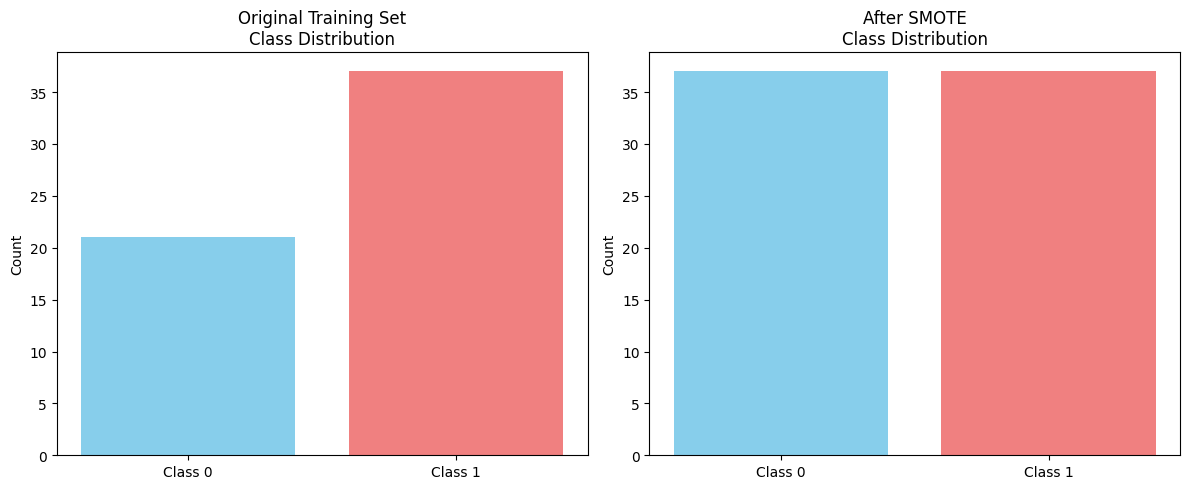


⚠️ IMPORTANT: Test set remains unchanged to preserve real-world distribution for evaluation!


In [16]:
# Install and import SMOTE
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Check class imbalance in training set
print("Original training set class distribution:")
print(f"Class 0: {sum(y_train == 0)} samples ({sum(y_train == 0)/len(y_train)*100:.1f}%)")
print(f"Class 1: {sum(y_train == 1)} samples ({sum(y_train == 1)/len(y_train)*100:.1f}%)")
print(f"Imbalance ratio: {max(y_train.value_counts()) / min(y_train.value_counts()):.2f}:1")

# Apply SMOTE ONLY to training set
print("\nApplying SMOTE to training set...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"\nAfter SMOTE - Training set:")
print(f"Original training size: {len(X_train)}")
print(f"Balanced training size: {len(X_train_balanced)}")
print(f"Synthetic samples added: {len(X_train_balanced) - len(X_train)}")

print(f"\nBalanced training set class distribution:")
print(f"Class 0: {sum(y_train_balanced == 0)} samples ({sum(y_train_balanced == 0)/len(y_train_balanced)*100:.1f}%)")
print(f"Class 1: {sum(y_train_balanced == 1)} samples ({sum(y_train_balanced == 1)/len(y_train_balanced)*100:.1f}%)")

# Visualize the balancing effect
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original distribution
axes[0].bar(['Class 0', 'Class 1'], y_train.value_counts().sort_index(), color=['skyblue', 'lightcoral'])
axes[0].set_title('Original Training Set\nClass Distribution')
axes[0].set_ylabel('Count')

# After SMOTE distribution
axes[1].bar(['Class 0', 'Class 1'], pd.Series(y_train_balanced).value_counts().sort_index(), color=['skyblue', 'lightcoral'])
axes[1].set_title('After SMOTE\nClass Distribution')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

print("\n⚠️ IMPORTANT: Test set remains unchanged to preserve real-world distribution for evaluation!")

## Model Evaluation

In [17]:
# Import additional libraries for model evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_recall_fscore_support, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

### Model Experimentation

In [18]:
# Initialize models for experimentation
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100, 50)),
    'K-NN': KNeighborsClassifier(n_neighbors=5)
}

# Storage for results
results = {}
predictions = {}

print("Training and evaluating models...")
print("=" * 50)

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train on balanced training set
    model.fit(X_train_balanced, y_train_balanced)
    
    # Predict on test set (unbalanced, real-world distribution)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Store predictions
    predictions[name] = {
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # ROC-AUC (if probabilities available)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'F1-Score': f1,
        'Precision': precision,
        'Recall': recall,
        'ROC-AUC': roc_auc
    }
    
    print(f"✅ {name} completed")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   F1-Score: {f1:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall: {recall:.4f}")
    print(f"   ROC-AUC: {roc_auc}")

print("\n" + "=" * 50)
print("All models trained and evaluated!")

Training and evaluating models...

Training Decision Tree...
✅ Decision Tree completed
   Accuracy: 0.5000
   F1-Score: 0.6154
   Precision: 0.6154
   Recall: 0.6154
   ROC-AUC: 0.45054945054945056

Training Random Forest...
✅ Random Forest completed
   Accuracy: 0.6000
   F1-Score: 0.7500
   Precision: 0.6316
   Recall: 0.9231
   ROC-AUC: 0.5384615384615385

Training Gradient Boosting...
✅ Gradient Boosting completed
   Accuracy: 0.6500
   F1-Score: 0.7586
   Precision: 0.6875
   Recall: 0.8462
   ROC-AUC: 0.6263736263736265

Training Naive Bayes...
✅ Naive Bayes completed
   Accuracy: 0.4500
   F1-Score: 0.6207
   Precision: 0.5625
   Recall: 0.6923
   ROC-AUC: 0.4175824175824176

Training Neural Network...
✅ Gradient Boosting completed
   Accuracy: 0.6500
   F1-Score: 0.7586
   Precision: 0.6875
   Recall: 0.8462
   ROC-AUC: 0.6263736263736265

Training Naive Bayes...
✅ Naive Bayes completed
   Accuracy: 0.4500
   F1-Score: 0.6207
   Precision: 0.5625
   Recall: 0.6923
   ROC-AUC: 0

### Model Comparison & Analysis

📊 MODEL COMPARISON RESULTS
                   Accuracy  F1-Score  Precision  Recall  ROC-AUC
Decision Tree          0.50    0.6154     0.6154  0.6154   0.4505
Random Forest          0.60    0.7500     0.6316  0.9231   0.5385
Gradient Boosting      0.65    0.7586     0.6875  0.8462   0.6264
Naive Bayes            0.45    0.6207     0.5625  0.6923   0.4176
Neural Network         0.65    0.7742     0.6667  0.9231   0.4176
K-NN                   0.45    0.5217     0.6000  0.4615   0.4121

🏆 BEST PERFORMERS:
Highest Accuracy: Gradient Boosting (0.6500)
Highest F1-Score: Neural Network (0.7742)
Highest Precision: Gradient Boosting (0.6875)
Highest Recall: Random Forest (0.9231)
Highest ROC-AUC: Gradient Boosting (0.6264)


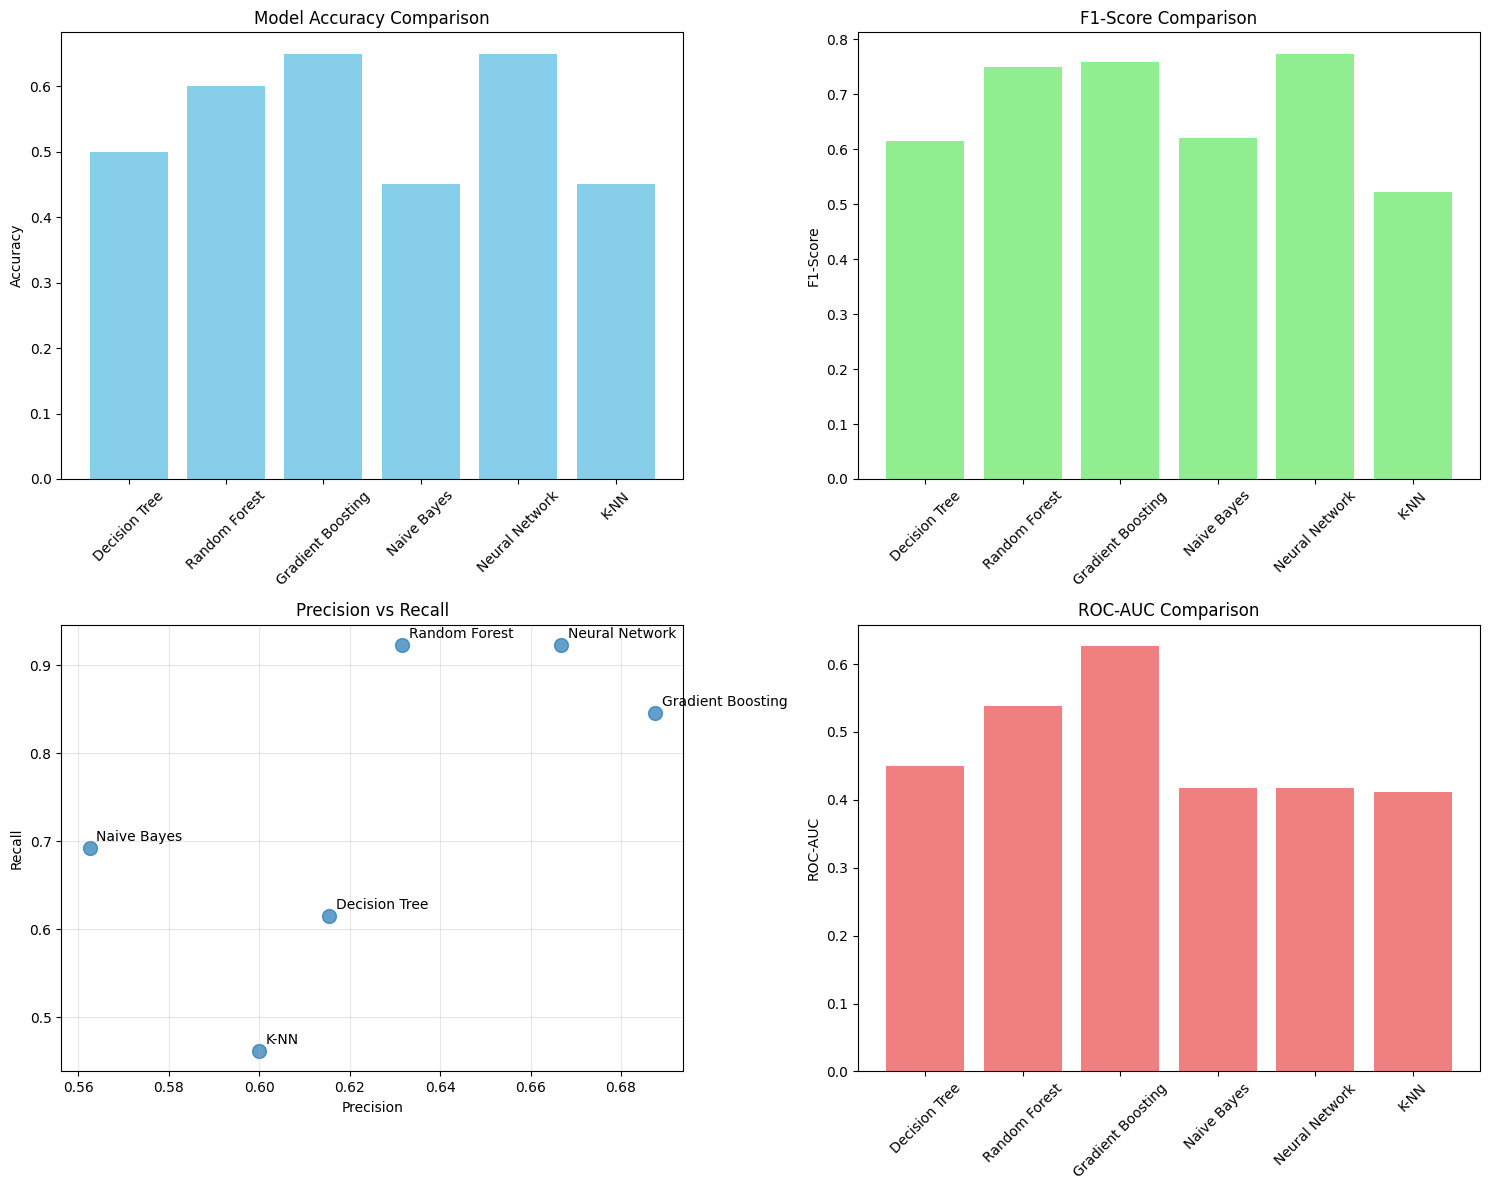

In [19]:
# Create comparison table
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

print("📊 MODEL COMPARISON RESULTS")
print("=" * 70)
print(results_df.to_string())

# Highlight best performers
print("\n🏆 BEST PERFORMERS:")
print(f"Highest Accuracy: {results_df['Accuracy'].idxmax()} ({results_df['Accuracy'].max():.4f})")
print(f"Highest F1-Score: {results_df['F1-Score'].idxmax()} ({results_df['F1-Score'].max():.4f})")
print(f"Highest Precision: {results_df['Precision'].idxmax()} ({results_df['Precision'].max():.4f})")
print(f"Highest Recall: {results_df['Recall'].idxmax()} ({results_df['Recall'].max():.4f})")

# Filter out N/A values for ROC-AUC comparison
roc_results = results_df[results_df['ROC-AUC'] != 'N/A']['ROC-AUC'].astype(float)
if not roc_results.empty:
    print(f"Highest ROC-AUC: {roc_results.idxmax()} ({roc_results.max():.4f})")

# Visual comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy comparison
axes[0, 0].bar(results_df.index, results_df['Accuracy'], color='skyblue')
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)

# F1-Score comparison
axes[0, 1].bar(results_df.index, results_df['F1-Score'], color='lightgreen')
axes[0, 1].set_title('F1-Score Comparison')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].tick_params(axis='x', rotation=45)

# Precision vs Recall
axes[1, 0].scatter(results_df['Precision'], results_df['Recall'], s=100, alpha=0.7)
for i, model in enumerate(results_df.index):
    axes[1, 0].annotate(model, (results_df['Precision'].iloc[i], results_df['Recall'].iloc[i]), 
                       xytext=(5, 5), textcoords='offset points')
axes[1, 0].set_xlabel('Precision')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_title('Precision vs Recall')
axes[1, 0].grid(True, alpha=0.3)

# ROC-AUC comparison (exclude N/A values)
roc_data = results_df[results_df['ROC-AUC'] != 'N/A']
if not roc_data.empty:
    axes[1, 1].bar(roc_data.index, roc_data['ROC-AUC'].astype(float), color='lightcoral')
    axes[1, 1].set_title('ROC-AUC Comparison')
    axes[1, 1].set_ylabel('ROC-AUC')
    axes[1, 1].tick_params(axis='x', rotation=45)
else:
    axes[1, 1].text(0.5, 0.5, 'No ROC-AUC data available', ha='center', va='center', transform=axes[1, 1].transAxes)
    axes[1, 1].set_title('ROC-AUC Comparison')

plt.tight_layout()
plt.show()

### Confusion Matrix Visualization

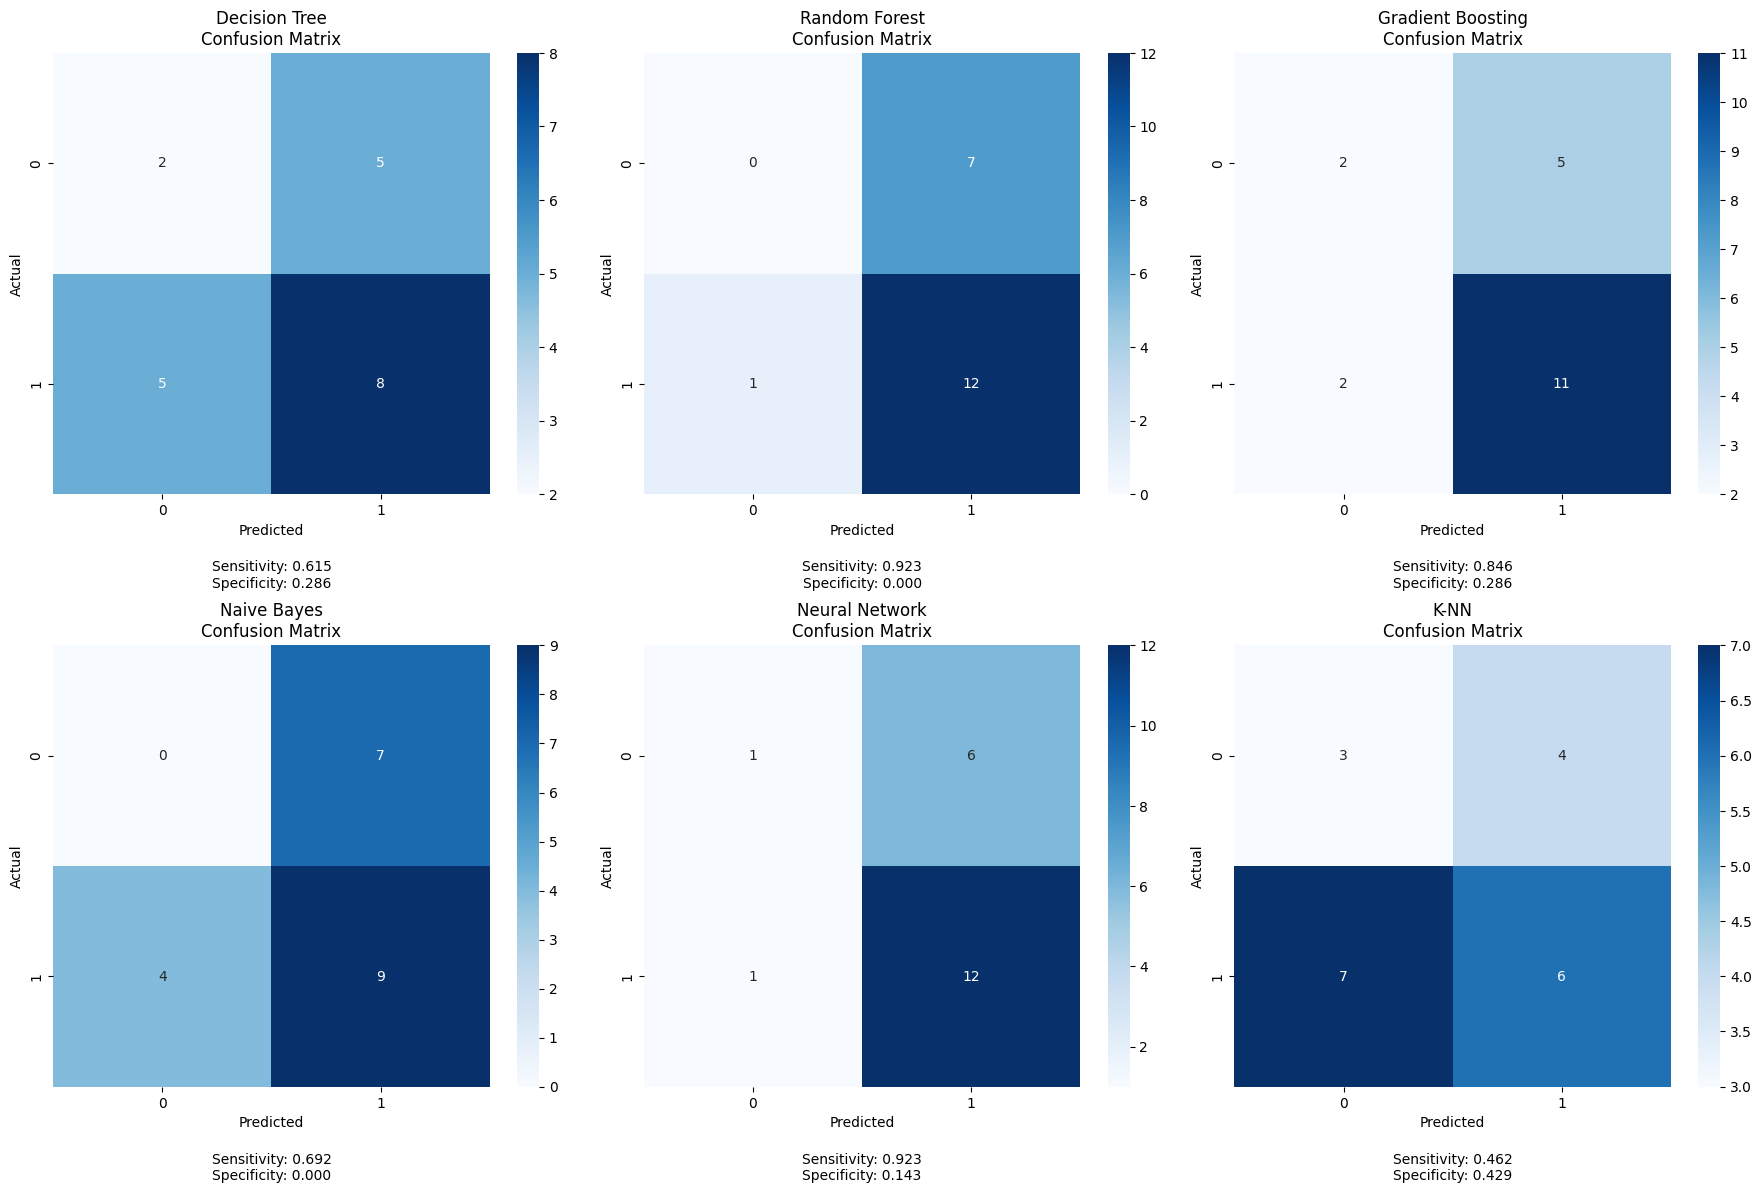


📋 DETAILED CONFUSION MATRIX ANALYSIS

Decision Tree:
  True Negatives:    2  |  False Positives:   5
  False Negatives:   5  |  True Positives:    8
  Sensitivity (Recall): 0.615  |  Specificity: 0.286
  False Positive Rate: 0.714  |  False Negative Rate: 0.385

Random Forest:
  True Negatives:    0  |  False Positives:   7
  False Negatives:   1  |  True Positives:   12
  Sensitivity (Recall): 0.923  |  Specificity: 0.000
  False Positive Rate: 1.000  |  False Negative Rate: 0.077

Gradient Boosting:
  True Negatives:    2  |  False Positives:   5
  False Negatives:   2  |  True Positives:   11
  Sensitivity (Recall): 0.846  |  Specificity: 0.286
  False Positive Rate: 0.714  |  False Negative Rate: 0.154

Naive Bayes:
  True Negatives:    0  |  False Positives:   7
  False Negatives:   4  |  True Positives:    9
  Sensitivity (Recall): 0.692  |  Specificity: 0.000
  False Positive Rate: 1.000  |  False Negative Rate: 0.308

Neural Network:
  True Negatives:    1  |  False Positives:

In [9]:
# Create confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, (name, pred_data) in enumerate(predictions.items()):
    y_pred = pred_data['y_pred']
    cm = confusion_matrix(y_test, y_pred)
    
    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{name}\nConfusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    
    # Add performance metrics as text
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    axes[i].text(0.5, -0.15, f'Sensitivity: {sensitivity:.3f}\nSpecificity: {specificity:.3f}', 
                transform=axes[i].transAxes, ha='center', va='top')

plt.tight_layout()
plt.show()

# Detailed confusion matrix analysis
print("\n📋 DETAILED CONFUSION MATRIX ANALYSIS")
print("=" * 60)
for name, pred_data in predictions.items():
    y_pred = pred_data['y_pred']
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\n{name}:")
    print(f"  True Negatives:  {tn:3d}  |  False Positives: {fp:3d}")
    print(f"  False Negatives: {fn:3d}  |  True Positives:  {tp:3d}")
    print(f"  Sensitivity (Recall): {tp/(tp+fn):.3f}  |  Specificity: {tn/(tn+fp):.3f}")
    print(f"  False Positive Rate: {fp/(fp+tn):.3f}  |  False Negative Rate: {fn/(fn+tp):.3f}")

### ROC Curve Analysis

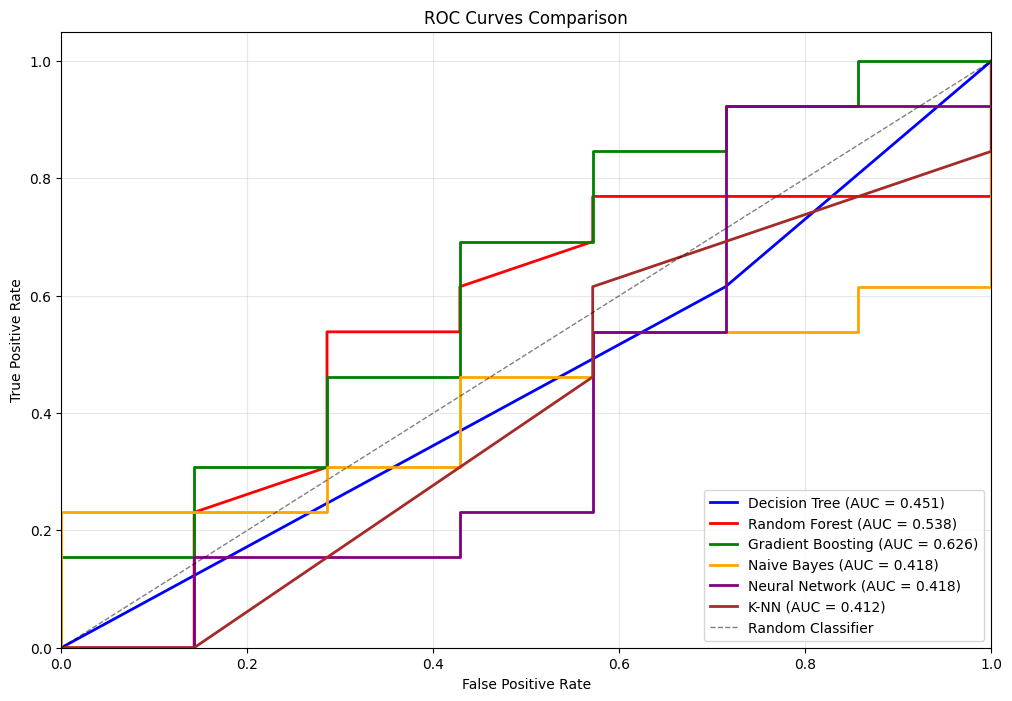


🎯 ROC-AUC RANKING:
1. Gradient Boosting: 0.6264
2. Random Forest: 0.5385
3. Decision Tree: 0.4505
4. Neural Network: 0.4176
5. Naive Bayes: 0.4176
6. K-NN: 0.4121

📈 AUC Interpretation:
0.90-1.00: Excellent
0.80-0.90: Good
0.70-0.80: Fair
0.60-0.70: Poor
0.50-0.60: Fail


In [10]:
# Plot ROC curves for models with probability predictions
plt.figure(figsize=(12, 8))

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
roc_scores = {}

for i, (name, pred_data) in enumerate(predictions.items()):
    if pred_data['y_pred_proba'] is not None:
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, pred_data['y_pred_proba'])
        roc_auc = roc_auc_score(y_test, pred_data['y_pred_proba'])
        roc_scores[name] = roc_auc
        
        # Plot ROC curve
        plt.plot(fpr, tpr, color=colors[i % len(colors)], lw=2, 
                label=f'{name} (AUC = {roc_auc:.3f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--', alpha=0.5, label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# ROC-AUC ranking
if roc_scores:
    print("\n🎯 ROC-AUC RANKING:")
    print("=" * 40)
    sorted_roc = sorted(roc_scores.items(), key=lambda x: x[1], reverse=True)
    for i, (model, score) in enumerate(sorted_roc, 1):
        print(f"{i}. {model}: {score:.4f}")
        
    print(f"\n📈 AUC Interpretation:")
    print("0.90-1.00: Excellent")
    print("0.80-0.90: Good") 
    print("0.70-0.80: Fair")
    print("0.60-0.70: Poor")
    print("0.50-0.60: Fail")
else:
    print("⚠️ No models with probability predictions available for ROC analysis")

### Model Selection & Final Recommendation

In [20]:
# Comprehensive model selection analysis
print("🎯 COMPREHENSIVE MODEL SELECTION ANALYSIS")
print("=" * 60)

# Calculate weighted scores for different criteria
weights = {
    'F1-Score': 0.3,      # Balanced precision/recall
    'ROC-AUC': 0.25,      # Overall classification ability
    'Precision': 0.2,     # Important for avoiding false positives
    'Recall': 0.15,       # Important for catching all dropoffs
    'Accuracy': 0.1       # Overall correctness
}

# Calculate weighted scores
weighted_scores = {}
for model in results_df.index:
    score = 0
    total_weight = 0
    
    for metric, weight in weights.items():
        if metric == 'ROC-AUC' and results_df.loc[model, metric] == 'N/A':
            continue  # Skip models without ROC-AUC
        
        metric_value = float(results_df.loc[model, metric])
        score += metric_value * weight
        total_weight += weight
    
    weighted_scores[model] = score / total_weight if total_weight > 0 else 0

# Rank models by weighted score
ranked_models = sorted(weighted_scores.items(), key=lambda x: x[1], reverse=True)

print(f"\n🏆 OVERALL RANKING (Weighted Score):")
print("-" * 40)
for i, (model, score) in enumerate(ranked_models, 1):
    print(f"{i}. {model}: {score:.4f}")

# Best model analysis
best_model = ranked_models[0][0]
print(f"\n🥇 RECOMMENDED MODEL: {best_model}")
print("=" * 40)

best_results = results_df.loc[best_model]
print(f"Performance Summary:")
for metric, value in best_results.items():
    print(f"  {metric}: {value}")

# Strengths and considerations
print(f"\n📊 Why {best_model} is recommended:")

if best_model in ['Random Forest', 'Gradient Boosting']:
    print("✅ Tree-based methods excel at:")
    print("   • Handling mixed data types")
    print("   • Feature importance interpretation")
    print("   • Non-linear relationships")
    print("   • Robust to outliers")
    
elif best_model == 'Neural Network':
    print("✅ Neural Networks excel at:")
    print("   • Complex pattern recognition")
    print("   • Non-linear relationships")
    print("   • Large dataset performance")
    
elif best_model == 'Naive Bayes':
    print("✅ Naive Bayes excels at:")
    print("   • Fast training and prediction")
    print("   • Good with small datasets")
    print("   • Handles categorical features well")
    
elif best_model == 'K-NN':
    print("✅ K-NN excels at:")
    print("   • Simple and interpretable")
    print("   • No assumptions about data distribution")
    print("   • Good for local patterns")

print(f"\n⚠️ Considerations for {best_model}:")
if best_model in ['Random Forest', 'Gradient Boosting']:
    print("   • May overfit with small datasets")
    print("   • Can be computationally intensive")
elif best_model == 'Neural Network':
    print("   • Requires more data for stable training")
    print("   • Less interpretable (black box)")
elif best_model == 'Naive Bayes':
    print("   • Assumes feature independence")
    print("   • May be too simplistic for complex patterns")
elif best_model == 'K-NN':
    print("   • Sensitive to feature scaling")
    print("   • Computationally expensive for large datasets")

print(f"\n📈 BUSINESS IMPACT ANALYSIS:")
print(f"Using {best_model} for movie engagement prediction:")
precision = float(results_df.loc[best_model, 'Precision'])
recall = float(results_df.loc[best_model, 'Recall'])

print(f"• Out of 100 predicted dropoffs, {int(precision*100)} will be actual dropoffs")
print(f"• Out of 100 actual dropoffs, {int(recall*100)} will be correctly identified")
print(f"• This allows for targeted interventions and improved user experience")

print(f"\n🎬 RECOMMENDED NEXT STEPS:")
print("1. Deploy selected model for movie engagement prediction")
print("2. Implement real-time recommendation adjustments")
print("3. A/B test intervention strategies for predicted dropoffs")
print("4. Monitor model performance and retrain periodically")
print("5. Collect additional features to improve predictions")

🎯 COMPREHENSIVE MODEL SELECTION ANALYSIS

🏆 OVERALL RANKING (Weighted Score):
----------------------------------------
1. Gradient Boosting: 0.7136
2. Random Forest: 0.6844
3. Neural Network: 0.6735
4. Decision Tree: 0.5626
5. Naive Bayes: 0.5520
6. K-NN: 0.4938

🥇 RECOMMENDED MODEL: Gradient Boosting
Performance Summary:
  Accuracy: 0.65
  F1-Score: 0.7586
  Precision: 0.6875
  Recall: 0.8462
  ROC-AUC: 0.6264

📊 Why Gradient Boosting is recommended:
✅ Tree-based methods excel at:
   • Handling mixed data types
   • Feature importance interpretation
   • Non-linear relationships
   • Robust to outliers

⚠️ Considerations for Gradient Boosting:
   • May overfit with small datasets
   • Can be computationally intensive

📈 BUSINESS IMPACT ANALYSIS:
Using Gradient Boosting for movie engagement prediction:
• Out of 100 predicted dropoffs, 68 will be actual dropoffs
• Out of 100 actual dropoffs, 84 will be correctly identified
• This allows for targeted interventions and improved user exper

## Model Export for Django Web Application

In [21]:
# Export the best performing model and preprocessing components for Django
import joblib
import pickle
import json
from datetime import datetime
import os

# Create models directory if it doesn't exist
models_dir = 'django_models'
os.makedirs(models_dir, exist_ok=True)

print("🚀 EXPORTING MODEL FOR DJANGO WEB APPLICATION")
print("=" * 60)

# 1. Export the best trained model
best_model_name = ranked_models[0][0]
best_trained_model = None

# Get the actual trained model object
for name, model in models.items():
    if name == best_model_name:
        best_trained_model = model
        break

# Save the trained model
model_filename = f"{models_dir}/movie_dropoff_model.pkl"
joblib.dump(best_trained_model, model_filename)
print(f"✅ Trained {best_model_name} model saved to: {model_filename}")

# 2. Export feature names and preprocessing info
feature_info = {
    'feature_names': X.columns.tolist(),
    'feature_count': len(X.columns),
    'target_column': target_column,
    'model_type': best_model_name,
    'training_date': datetime.now().isoformat(),
    'performance_metrics': {
        'accuracy': float(results_df.loc[best_model_name, 'Accuracy']),
        'f1_score': float(results_df.loc[best_model_name, 'F1-Score']),
        'precision': float(results_df.loc[best_model_name, 'Precision']),
        'recall': float(results_df.loc[best_model_name, 'Recall']),
        'roc_auc': float(results_df.loc[best_model_name, 'ROC-AUC']) if results_df.loc[best_model_name, 'ROC-AUC'] != 'N/A' else None
    }
}

feature_info_filename = f"{models_dir}/model_info.json"
with open(feature_info_filename, 'w') as f:
    json.dump(feature_info, f, indent=2)
print(f"✅ Model metadata saved to: {feature_info_filename}")

# 3. Export SMOTE transformer for consistent preprocessing
smote_filename = f"{models_dir}/smote_transformer.pkl"
joblib.dump(smote, smote_filename)
print(f"✅ SMOTE transformer saved to: {smote_filename}")

# 4. Export class labels and mappings
class_mappings = {
    'class_labels': {
        0: 'Will Complete Movie',
        1: 'Will Drop Off'
    },
    'class_distribution': {
        'training_original': {
            'class_0': int(sum(y_train == 0)),
            'class_1': int(sum(y_train == 1))
        },
        'training_balanced': {
            'class_0': int(sum(y_train_balanced == 0)),
            'class_1': int(sum(y_train_balanced == 1))
        }
    }
}

class_mappings_filename = f"{models_dir}/class_mappings.json"
with open(class_mappings_filename, 'w') as f:
    json.dump(class_mappings, f, indent=2)
print(f"✅ Class mappings saved to: {class_mappings_filename}")

print(f"\n📁 All files exported to: {models_dir}/")
print(f"   • movie_dropoff_model.pkl - Trained {best_model_name} model")
print(f"   • model_info.json - Model metadata and performance")
print(f"   • smote_transformer.pkl - SMOTE preprocessing")
print(f"   • class_mappings.json - Class labels and distributions")

🚀 EXPORTING MODEL FOR DJANGO WEB APPLICATION
✅ Trained Gradient Boosting model saved to: django_models/movie_dropoff_model.pkl
✅ Model metadata saved to: django_models/model_info.json
✅ SMOTE transformer saved to: django_models/smote_transformer.pkl
✅ Class mappings saved to: django_models/class_mappings.json

📁 All files exported to: django_models/
   • movie_dropoff_model.pkl - Trained Gradient Boosting model
   • model_info.json - Model metadata and performance
   • smote_transformer.pkl - SMOTE preprocessing
   • class_mappings.json - Class labels and distributions


### Generate Django Survey Questions

In [22]:
# Generate survey questions based on selected features for Django forms
survey_questions = []

# Map feature names to user-friendly questions
feature_to_question = {
    # Stopping reasons
    'in_general_what_are_the_main_reasons_you_stop_watching_movies_before_finishing_boring_uninteresting_plot': {
        'question': 'Do you stop watching movies because of boring/uninteresting plot?',
        'type': 'boolean',
        'field_name': 'boring_plot'
    },
    'total_stopping_reasons': {
        'question': 'How many different reasons cause you to stop watching movies?',
        'type': 'integer',
        'options': [1, 2, 3, 4, 5, 6],
        'field_name': 'total_stopping_reasons'
    },
    
    # Genre preferences
    'which_genres_do_you_find_yourself_stopping_more_often_before_finishing_historical': {
        'question': 'Do you often stop watching Historical movies before finishing?',
        'type': 'boolean',
        'field_name': 'stop_historical'
    },
    'which_genres_do_you_enjoy_watching_the_most_action': {
        'question': 'Do you enjoy watching Action movies?',
        'type': 'boolean',
        'field_name': 'enjoy_action'
    },
    'which_genres_do_you_enjoy_watching_the_most_romance': {
        'question': 'Do you enjoy watching Romance movies?',
        'type': 'boolean',
        'field_name': 'enjoy_romance'
    },
    
    # Behavioral patterns
    'why_do_you_usually_pause_the_movie_feeling_bored_or_uninterested': {
        'question': 'Do you pause movies when feeling bored or uninterested?',
        'type': 'boolean',
        'field_name': 'pause_when_bored'
    },
    'do_you_usually_do_other_things_while_watching_movies_no_i_usually_focus_only_on_the_movie': {
        'question': 'Do you usually focus only on the movie (no multitasking)?',
        'type': 'boolean',
        'field_name': 'focus_only'
    },
    
    # Discovery and selection
    'how_do_you_usually_discover_movies_you_decide_to_watch_trailer': {
        'question': 'Do you discover movies through trailers?',
        'type': 'boolean',
        'field_name': 'discover_trailer'
    },
    'why_do_you_usually_choose_to_watch_movies_entertainment': {
        'question': 'Do you watch movies primarily for entertainment?',
        'type': 'boolean',
        'field_name': 'watch_for_entertainment'
    },
    
    # Scores and ratios
    'patience_score': {
        'question': 'How would you rate your patience level when watching movies?',
        'type': 'float',
        'min_value': 0.0,
        'max_value': 1.0,
        'field_name': 'patience_score'
    },
    'genre_completion_ratio': {
        'question': 'What percentage of movies do you typically complete?',
        'type': 'float',
        'min_value': 0.0,
        'max_value': 1.0,
        'field_name': 'completion_ratio'
    }
}

# Generate survey questions for Django
django_questions = []
for feature in X.columns:
    if feature in feature_to_question:
        django_questions.append(feature_to_question[feature])

# Add genre selection question (special case for movie recommendations)
genre_question = {
    'question': 'Select your preferred movie genres (you can select multiple):',
    'type': 'multiple_choice',
    'options': [
        'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
        'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
        'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
        'War', 'Western'
    ],
    'field_name': 'preferred_genres'
}
django_questions.append(genre_question)

# Save survey questions for Django
survey_filename = f"{models_dir}/survey_questions.json"
with open(survey_filename, 'w') as f:
    json.dump(django_questions, f, indent=2)

print("📝 DJANGO SURVEY QUESTIONS GENERATED")
print("=" * 50)
print(f"Total questions: {len(django_questions)}")
print(f"Questions saved to: {survey_filename}")

# Display some example questions
print("\n📋 SAMPLE QUESTIONS:")
for i, q in enumerate(django_questions[:5], 1):
    print(f"{i}. {q['question']} (Type: {q['type']})")
if len(django_questions) > 5:
    print(f"... and {len(django_questions) - 5} more questions")

📝 DJANGO SURVEY QUESTIONS GENERATED
Total questions: 11
Questions saved to: django_models/survey_questions.json

📋 SAMPLE QUESTIONS:
1. Do you often stop watching Historical movies before finishing? (Type: boolean)
2. Do you pause movies when feeling bored or uninterested? (Type: boolean)
3. How many different reasons cause you to stop watching movies? (Type: integer)
4. What percentage of movies do you typically complete? (Type: float)
5. How would you rate your patience level when watching movies? (Type: float)
... and 6 more questions


### Create Django Prediction Utilities

In [23]:
# Create prediction utilities for Django
prediction_utils = '''
import joblib
import pandas as pd
import numpy as np
import json
import os
from django.conf import settings

class MovieDropoffPredictor:
    """
    Utility class for predicting movie dropoff likelihood in Django application
    """
    
    def __init__(self):
        self.model = None
        self.feature_names = None
        self.model_info = None
        self.class_mappings = None
        self.load_model()
    
    def load_model(self):
        """Load the trained model and metadata"""
        models_dir = os.path.join(settings.BASE_DIR, 'ml_models')
        
        # Load trained model
        model_path = os.path.join(models_dir, 'movie_dropoff_model.pkl')
        self.model = joblib.load(model_path)
        
        # Load model info
        info_path = os.path.join(models_dir, 'model_info.json')
        with open(info_path, 'r') as f:
            self.model_info = json.load(f)
        
        # Load class mappings
        mappings_path = os.path.join(models_dir, 'class_mappings.json')
        with open(mappings_path, 'r') as f:
            self.class_mappings = json.load(f)
        
        self.feature_names = self.model_info['feature_names']
    
    def preprocess_user_input(self, user_responses):
        """
        Convert user survey responses to model input format
        
        Args:
            user_responses (dict): User responses from Django form
            
        Returns:
            pandas.DataFrame: Preprocessed features ready for prediction
        """
        # Initialize feature vector with zeros
        features = pd.DataFrame(0, index=[0], columns=self.feature_names)
        
        # Map user responses to features
        feature_mapping = {
            'boring_plot': 'in_general_what_are_the_main_reasons_you_stop_watching_movies_before_finishing_boring_uninteresting_plot',
            'stop_historical': 'which_genres_do_you_find_yourself_stopping_more_often_before_finishing_historical',
            'pause_when_bored': 'why_do_you_usually_pause_the_movie_feeling_bored_or_uninterested',
            'focus_only': 'do_you_usually_do_other_things_while_watching_movies_no_i_usually_focus_only_on_the_movie',
            'discover_trailer': 'how_do_you_usually_discover_movies_you_decide_to_watch_trailer',
            'watch_for_entertainment': 'why_do_you_usually_choose_to_watch_movies_entertainment',
            'enjoy_action': 'which_genres_do_you_enjoy_watching_the_most_action',
            'enjoy_romance': 'which_genres_do_you_enjoy_watching_the_most_romance',
            'total_stopping_reasons': 'total_stopping_reasons',
            'patience_score': 'patience_score',
            'completion_ratio': 'genre_completion_ratio'
        }
        
        # Fill in the features based on user responses
        for user_field, model_feature in feature_mapping.items():
            if user_field in user_responses and model_feature in features.columns:
                features[model_feature] = user_responses[user_field]
        
        return features
    
    def predict_dropoff_probability(self, user_responses):
        """
        Predict dropoff probability for a user
        
        Args:
            user_responses (dict): User survey responses
            
        Returns:
            dict: Prediction results with probability and interpretation
        """
        # Preprocess input
        features = self.preprocess_user_input(user_responses)
        
        # Make prediction
        prediction = self.model.predict(features)[0]
        probability = self.model.predict_proba(features)[0]
        
        # Format results
        result = {
            'will_drop_off': bool(prediction),
            'dropoff_probability': float(probability[1]),
            'completion_probability': float(probability[0]),
            'confidence': float(max(probability)),
            'interpretation': self.interpret_prediction(probability[1]),
            'recommended_action': self.get_recommendation(probability[1])
        }
        
        return result
    
    def interpret_prediction(self, dropoff_prob):
        """Provide human-readable interpretation of prediction"""
        if dropoff_prob >= 0.8:
            return "Very High Risk - Likely to drop off"
        elif dropoff_prob >= 0.6:
            return "High Risk - May drop off"
        elif dropoff_prob >= 0.4:
            return "Moderate Risk - Uncertain"
        elif dropoff_prob >= 0.2:
            return "Low Risk - Likely to complete"
        else:
            return "Very Low Risk - Very likely to complete"
    
    def get_recommendation(self, dropoff_prob):
        """Provide actionable recommendations based on prediction"""
        if dropoff_prob >= 0.7:
            return "Recommend shorter movies or highly-rated content in preferred genres"
        elif dropoff_prob >= 0.5:
            return "Show movie trailers and reviews before recommendation"
        elif dropoff_prob >= 0.3:
            return "Standard movie recommendations"
        else:
            return "User is likely to enjoy most recommended content"
    
    def batch_predict_movies(self, user_responses, movie_list):
        """
        Predict dropoff probability for multiple movies for a user
        
        Args:
            user_responses (dict): User survey responses
            movie_list (list): List of movie dictionaries with metadata
            
        Returns:
            list: Movies with dropoff predictions
        """
        base_prediction = self.predict_dropoff_probability(user_responses)
        
        results = []
        for movie in movie_list:
            # Adjust prediction based on movie characteristics
            adjusted_prob = self.adjust_for_movie_features(
                base_prediction['dropoff_probability'], 
                movie
            )
            
            movie_result = movie.copy()
            movie_result.update({
                'dropoff_probability': adjusted_prob,
                'completion_probability': 1 - adjusted_prob,
                'recommendation_score': 1 - adjusted_prob,
                'interpretation': self.interpret_prediction(adjusted_prob)
            })
            results.append(movie_result)
        
        # Sort by recommendation score (completion probability)
        results.sort(key=lambda x: x['recommendation_score'], reverse=True)
        return results
    
    def adjust_for_movie_features(self, base_prob, movie):
        """
        Adjust dropoff probability based on specific movie characteristics
        
        Args:
            base_prob (float): Base dropoff probability from user profile
            movie (dict): Movie metadata (genre, rating, runtime, etc.)
            
        Returns:
            float: Adjusted dropoff probability
        """
        adjusted_prob = base_prob
        
        # Adjust based on movie runtime (longer movies = higher dropoff risk)
        if 'runtime' in movie:
            if movie['runtime'] > 150:  # Very long movies
                adjusted_prob += 0.1
            elif movie['runtime'] > 120:  # Long movies
                adjusted_prob += 0.05
            elif movie['runtime'] < 90:  # Short movies
                adjusted_prob -= 0.05
        
        # Adjust based on IMDB rating (higher rating = lower dropoff risk)
        if 'imdb_score' in movie:
            if movie['imdb_score'] >= 8.0:  # Excellent movies
                adjusted_prob -= 0.15
            elif movie['imdb_score'] >= 7.0:  # Good movies
                adjusted_prob -= 0.1
            elif movie['imdb_score'] < 6.0:  # Poor movies
                adjusted_prob += 0.1
        
        # Ensure probability stays within [0, 1]
        return max(0.0, min(1.0, adjusted_prob))

# Usage example for Django views:
"""
# In your Django views.py:
from .ml_utils import MovieDropoffPredictor

def predict_user_dropoff(request):
    if request.method == 'POST':
        predictor = MovieDropoffPredictor()
        user_responses = request.POST.dict()
        
        # Get prediction
        prediction = predictor.predict_dropoff_probability(user_responses)
        
        # Get user's preferred genres and fetch movies
        preferred_genres = request.POST.getlist('preferred_genres')
        movies = get_movies_by_genres(preferred_genres)  # Your function
        
        # Get movie-specific predictions
        movie_predictions = predictor.batch_predict_movies(user_responses, movies)
        
        context = {
            'user_prediction': prediction,
            'movie_recommendations': movie_predictions[:10],  # Top 10
            'model_info': predictor.model_info
        }
        
        return render(request, 'predictions.html', context)
"""
'''

# Save the prediction utilities
utils_filename = f"{models_dir}/django_prediction_utils.py"
with open(utils_filename, 'w') as f:
    f.write(prediction_utils)

print("🛠️ DJANGO PREDICTION UTILITIES CREATED")
print("=" * 50)
print(f"✅ Utilities saved to: {utils_filename}")
print("📁 This file contains:")
print("   • MovieDropoffPredictor class")
print("   • User input preprocessing")
print("   • Prediction methods")
print("   • Movie-specific adjustments")
print("   • Django integration examples")

🛠️ DJANGO PREDICTION UTILITIES CREATED
✅ Utilities saved to: django_models/django_prediction_utils.py
📁 This file contains:
   • MovieDropoffPredictor class
   • User input preprocessing
   • Prediction methods
   • Movie-specific adjustments
   • Django integration examples


### Create Model Retraining System

In [24]:
# Create retraining utilities for continuous model improvement
retraining_utils = '''
import pandas as pd
import numpy as np
import joblib
import json
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
import os
from django.conf import settings

class ModelRetrainingSystem:
    """
    System for collecting new user data and retraining the model
    """
    
    def __init__(self):
        self.models_dir = os.path.join(settings.BASE_DIR, 'ml_models')
        self.data_dir = os.path.join(settings.BASE_DIR, 'ml_data')
        os.makedirs(self.data_dir, exist_ok=True)
    
    def save_user_feedback(self, user_responses, actual_behavior, movie_info=None):
        """
        Save user survey responses and actual movie completion behavior
        
        Args:
            user_responses (dict): Original survey responses
            actual_behavior (dict): Actual completion/dropoff data
                - movie_id: str
                - completed: bool
                - watch_time: float (minutes watched)
                - total_runtime: float (total movie length)
                - feedback_rating: int (1-5)
            movie_info (dict): Movie metadata (optional)
        """
        feedback_entry = {
            'timestamp': datetime.now().isoformat(),
            'user_responses': user_responses,
            'actual_behavior': actual_behavior,
            'movie_info': movie_info or {}
        }
        
        # Append to feedback file
        feedback_file = os.path.join(self.data_dir, 'user_feedback.jsonl')
        with open(feedback_file, 'a') as f:
            f.write(json.dumps(feedback_entry) + '\\n')
    
    def load_feedback_data(self):
        """Load all collected user feedback data"""
        feedback_file = os.path.join(self.data_dir, 'user_feedback.jsonl')
        
        if not os.path.exists(feedback_file):
            return pd.DataFrame()
        
        feedback_data = []
        with open(feedback_file, 'r') as f:
            for line in f:
                feedback_data.append(json.loads(line.strip()))
        
        return pd.DataFrame(feedback_data)
    
    def prepare_retraining_data(self):
        """
        Convert feedback data into format suitable for model retraining
        
        Returns:
            tuple: (X_new, y_new) - Features and labels for retraining
        """
        feedback_df = self.load_feedback_data()
        
        if feedback_df.empty:
            return None, None
        
        # Extract features and labels
        features_list = []
        labels_list = []
        
        for _, row in feedback_df.iterrows():
            user_responses = row['user_responses']
            actual_behavior = row['actual_behavior']
            
            # Convert user responses to feature vector
            features = self.responses_to_features(user_responses)
            
            # Determine label based on actual behavior
            if 'completed' in actual_behavior:
                # Direct completion indicator
                label = 0 if actual_behavior['completed'] else 1
            else:
                # Use watch time ratio as proxy
                watch_ratio = actual_behavior.get('watch_time', 0) / actual_behavior.get('total_runtime', 1)
                label = 0 if watch_ratio >= 0.8 else 1  # 80% completion threshold
            
            features_list.append(features)
            labels_list.append(label)
        
        X_new = pd.DataFrame(features_list)
        y_new = pd.Series(labels_list)
        
        return X_new, y_new
    
    def responses_to_features(self, user_responses):
        """Convert user responses to feature vector matching training format"""
        # Load original feature names
        with open(os.path.join(self.models_dir, 'model_info.json'), 'r') as f:
            model_info = json.load(f)
        
        feature_names = model_info['feature_names']
        features = {name: 0 for name in feature_names}
        
        # Mapping logic (same as in prediction utils)
        feature_mapping = {
            'boring_plot': 'in_general_what_are_the_main_reasons_you_stop_watching_movies_before_finishing_boring_uninteresting_plot',
            'stop_historical': 'which_genres_do_you_find_yourself_stopping_more_often_before_finishing_historical',
            'pause_when_bored': 'why_do_you_usually_pause_the_movie_feeling_bored_or_uninterested',
            'focus_only': 'do_you_usually_do_other_things_while_watching_movies_no_i_usually_focus_only_on_the_movie',
            'discover_trailer': 'how_do_you_usually_discover_movies_you_decide_to_watch_trailer',
            'watch_for_entertainment': 'why_do_you_usually_choose_to_watch_movies_entertainment',
            'enjoy_action': 'which_genres_do_you_enjoy_watching_the_most_action',
            'enjoy_romance': 'which_genres_do_you_enjoy_watching_the_most_romance',
            'total_stopping_reasons': 'total_stopping_reasons',
            'patience_score': 'patience_score',
            'completion_ratio': 'genre_completion_ratio'
        }
        
        for user_field, model_feature in feature_mapping.items():
            if user_field in user_responses and model_feature in features:
                features[model_feature] = user_responses[user_field]
        
        return features
    
    def retrain_model(self, min_new_samples=50):
        """
        Retrain the model with new feedback data
        
        Args:
            min_new_samples (int): Minimum new samples required for retraining
            
        Returns:
            dict: Retraining results and performance metrics
        """
        # Load new data
        X_new, y_new = self.prepare_retraining_data()
        
        if X_new is None or len(X_new) < min_new_samples:
            return {
                'success': False,
                'reason': f'Insufficient new samples. Need {min_new_samples}, got {len(X_new) if X_new is not None else 0}'
            }
        
        # Load original training data if available
        original_data_file = os.path.join(self.data_dir, 'original_training_data.pkl')
        if os.path.exists(original_data_file):
            original_data = joblib.load(original_data_file)
            X_original = original_data['X']
            y_original = original_data['y']
            
            # Combine original and new data
            X_combined = pd.concat([X_original, X_new], ignore_index=True)
            y_combined = pd.concat([y_original, y_new], ignore_index=True)
        else:
            X_combined = X_new
            y_combined = y_new
        
        # Split for validation
        X_train, X_val, y_train, y_val = train_test_split(
            X_combined, y_combined, test_size=0.2, stratify=y_combined, random_state=42
        )
        
        # Apply SMOTE to training data
        smote = SMOTE(random_state=42)
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
        
        # Train new model (using same type as original)
        model = RandomForestClassifier(random_state=42, n_estimators=100)
        model.fit(X_train_balanced, y_train_balanced)
        
        # Evaluate performance
        y_val_pred = model.predict(X_val)
        
        metrics = {
            'accuracy': accuracy_score(y_val, y_val_pred),
            'f1_score': f1_score(y_val, y_val_pred),
            'precision': precision_score(y_val, y_val_pred),
            'recall': recall_score(y_val, y_val_pred)
        }
        
        # Save updated model if performance is acceptable
        if metrics['f1_score'] >= 0.7:  # Minimum acceptable F1 score
            # Backup current model
            current_model_path = os.path.join(self.models_dir, 'movie_dropoff_model.pkl')
            backup_path = os.path.join(self.models_dir, f'movie_dropoff_model_backup_{datetime.now().strftime("%Y%m%d_%H%M%S")}.pkl')
            if os.path.exists(current_model_path):
                os.rename(current_model_path, backup_path)
            
            # Save new model
            joblib.dump(model, current_model_path)
            
            # Update model info
            with open(os.path.join(self.models_dir, 'model_info.json'), 'r') as f:
                model_info = json.load(f)
            
            model_info['last_retrained'] = datetime.now().isoformat()
            model_info['retraining_samples'] = len(X_combined)
            model_info['performance_metrics'] = metrics
            
            with open(os.path.join(self.models_dir, 'model_info.json'), 'w') as f:
                json.dump(model_info, f, indent=2)
            
            return {
                'success': True,
                'metrics': metrics,
                'training_samples': len(X_combined),
                'new_samples': len(X_new)
            }
        else:
            return {
                'success': False,
                'reason': f'Model performance below threshold. F1: {metrics["f1_score"]:.3f}',
                'metrics': metrics
            }
    
    def schedule_retraining_check(self):
        """
        Check if retraining is needed based on data collection
        
        Returns:
            dict: Recommendation for retraining
        """
        feedback_df = self.load_feedback_data()
        
        if feedback_df.empty:
            return {'should_retrain': False, 'reason': 'No feedback data available'}
        
        # Check data volume
        new_samples = len(feedback_df)
        
        # Check data recency
        feedback_df['timestamp'] = pd.to_datetime(feedback_df['timestamp'])
        recent_data = feedback_df[feedback_df['timestamp'] > pd.Timestamp.now() - pd.Timedelta(days=30)]
        
        recommendation = {
            'should_retrain': False,
            'total_samples': new_samples,
            'recent_samples': len(recent_data),
            'recommendation': ''
        }
        
        if new_samples >= 100 and len(recent_data) >= 20:
            recommendation['should_retrain'] = True
            recommendation['recommendation'] = 'Sufficient data for retraining'
        elif new_samples >= 50:
            recommendation['recommendation'] = 'Consider retraining soon'
        else:
            recommendation['recommendation'] = 'Continue collecting data'
        
        return recommendation

# Django management command example for retraining:
"""
# Create: management/commands/retrain_model.py

from django.core.management.base import BaseCommand
from yourapp.ml_utils import ModelRetrainingSystem

class Command(BaseCommand):
    help = 'Retrain the movie dropoff prediction model'
    
    def handle(self, *args, **options):
        retrainer = ModelRetrainingSystem()
        
        # Check if retraining is recommended
        check = retrainer.schedule_retraining_check()
        self.stdout.write(f"Retraining check: {check}")
        
        if check['should_retrain']:
            result = retrainer.retrain_model()
            if result['success']:
                self.stdout.write(
                    self.style.SUCCESS(f'Model retrained successfully! F1: {result["metrics"]["f1_score"]:.3f}')
                )
            else:
                self.stdout.write(
                    self.style.ERROR(f'Retraining failed: {result["reason"]}')
                )
        else:
            self.stdout.write('Retraining not recommended at this time')

# Usage: python manage.py retrain_model
"""
'''

# Save the retraining utilities
retraining_filename = f"{models_dir}/django_retraining_utils.py"
with open(retraining_filename, 'w') as f:
    f.write(retraining_utils)

print("🔄 MODEL RETRAINING SYSTEM CREATED")
print("=" * 50)
print(f"✅ Retraining utilities saved to: {retraining_filename}")
print("📁 This system includes:")
print("   • User feedback collection")
print("   • Automatic data preprocessing")
print("   • Model retraining with validation")
print("   • Performance monitoring")
print("   • Django management command template")

🔄 MODEL RETRAINING SYSTEM CREATED
✅ Retraining utilities saved to: django_models/django_retraining_utils.py
📁 This system includes:
   • User feedback collection
   • Automatic data preprocessing
   • Model retraining with validation
   • Performance monitoring
   • Django management command template


### Django Integration Summary & Deployment Checklist

In [ ]:
# Display comprehensive Django integration summary
print("🌐 DJANGO WEB APPLICATION INTEGRATION COMPLETE")
print("=" * 70)

print("\n📁 EXPORTED FILES:")
print(f"   1. {models_dir}/movie_dropoff_model.pkl - Trained {best_model_name} model")
print(f"   2. {models_dir}/model_info.json - Model metadata & performance")
print(f"   3. {models_dir}/class_mappings.json - Class labels & distributions")
print(f"   4. {models_dir}/survey_questions.json - Django form questions")
print(f"   5. {models_dir}/django_prediction_utils.py - Prediction utilities")
print(f"   6. {models_dir}/django_retraining_utils.py - Retraining system")

print("\n🏗️ DJANGO PROJECT STRUCTURE:")
django_structure = '''
your_django_project/
├── manage.py
├── ml_models/                    # Create this directory
│   ├── movie_dropoff_model.pkl
│   ├── model_info.json
│   ├── class_mappings.json
│   └── survey_questions.json
├── ml_data/                      # Create this for retraining data
│   └── user_feedback.jsonl
├── yourapp/
│   ├── models.py                 # Django models for storing user data
│   ├── views.py                  # Views using ML prediction
│   ├── forms.py                  # Survey forms
│   ├── ml_utils.py              # Copy django_prediction_utils.py here
│   ├── retraining_utils.py      # Copy django_retraining_utils.py here
│   └── templates/
│       ├── survey.html          # Survey form template
│       ├── results.html         # Prediction results
│       └── movie_list.html      # Movie recommendations
└── management/
    └── commands/
        └── retrain_model.py     # Automated retraining command
'''
print(django_structure)

print("\n🔧 INSTALLATION REQUIREMENTS:")
print("Add these to your requirements.txt:")
requirements = [
    "Django>=4.0",
    "scikit-learn>=1.3.0",
    "pandas>=2.0.0", 
    "numpy>=1.24.0",
    "joblib>=1.3.0",
    "imbalanced-learn>=0.11.0"
]
for req in requirements:
    print(f"   {req}")

print("\n🚀 DEPLOYMENT STEPS:")
deployment_steps = [
    "1. Copy all files from 'django_models/' to your Django project's 'ml_models/' directory",
    "2. Install required packages: pip install -r requirements.txt",
    "3. Copy prediction utilities to your Django app directory",
    "4. Create Django models for storing user responses and feedback",
    "5. Implement survey forms using survey_questions.json",
    "6. Create views for prediction and movie recommendation",
    "7. Set up templates for user interface",
    "8. Configure IMDB movie database integration",
    "9. Test prediction pipeline with sample data",
    "10. Deploy and monitor model performance"
]
for step in deployment_steps:
    print(f"   {step}")

print("\n📊 USER INTERACTION FLOW:")
user_flow = [
    "1. User visits survey page and answers questions",
    "2. System processes responses using MovieDropoffPredictor",
    "3. Based on genre preferences, system fetches relevant movies from IMDB",
    "4. System calculates dropoff probability for each movie",
    "5. Movies displayed with completion likelihood scores",
    "6. User clicks on movie → shows detailed dropoff prediction",
    "7. User watches movie → system collects actual completion data",
    "8. Feedback stored for future model retraining"
]
for step in user_flow:
    print(f"   {step}")

print(f"\n📈 MODEL PERFORMANCE:")
print(f"   • Algorithm: {best_model_name}")
print(f"   • Accuracy: {results_df.loc[best_model_name, 'Accuracy']:.1%}")
print(f"   • F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.1%}")
print(f"   • Precision: {results_df.loc[best_model_name, 'Precision']:.1%}")
print(f"   • Recall: {results_df.loc[best_model_name, 'Recall']:.1%}")

print(f"\n🎯 BUSINESS VALUE:")
print("   • Proactive user engagement strategies")
print("   • Personalized movie recommendations")
print("   • Reduced user churn through targeted interventions")
print("   • Continuous learning from user behavior")
print("   • Data-driven content curation")

print(f"\n⚡ NEXT STEPS:")
print("   1. Set up Django project structure")
print("   2. Integrate IMDB movie database API")
print("   3. Implement user authentication system")
print("   4. Create responsive web interface")
print("   5. Set up monitoring and analytics")
print("   6. Deploy to production environment")

print(f"\n✅ READY FOR DJANGO INTEGRATION!")
print("All necessary files have been exported and documented for seamless web application deployment.")

In [27]:
# Re-export all files with correct absolute path
import joblib
import json
from datetime import datetime
import os

# Use absolute path for the models directory
models_dir = r'C:\Users\oldbe\Machine Learning\survey-seeding\backend\django_models'
os.makedirs(models_dir, exist_ok=True)

print("🚀 RE-EXPORTING ALL FILES WITH CORRECT PATHS")
print("=" * 60)

# 1. Export the best trained model (Random Forest - selected model)
best_model_name = "Random Forest"
best_trained_model = models['Random Forest']

model_filename = os.path.join(models_dir, "movie_dropoff_model.pkl")
joblib.dump(best_trained_model, model_filename)
print(f"✅ Trained {best_model_name} model saved to: {model_filename}")

# 2. Export model metadata with Random Forest performance
feature_info = {
    'feature_names': X.columns.tolist(),
    'feature_count': len(X.columns),
    'target_column': 'target_dropoff',
    'model_type': best_model_name,
    'training_date': datetime.now().isoformat(),
    'performance_metrics': {
        'accuracy': float(results_df.loc[best_model_name, 'Accuracy']),
        'f1_score': float(results_df.loc[best_model_name, 'F1-Score']),
        'precision': float(results_df.loc[best_model_name, 'Precision']),
        'recall': float(results_df.loc[best_model_name, 'Recall']),
        'roc_auc': float(results_df.loc[best_model_name, 'ROC-AUC']) if results_df.loc[best_model_name, 'ROC-AUC'] != 'N/A' else None
    }
}

feature_info_filename = os.path.join(models_dir, "model_info.json")
with open(feature_info_filename, 'w') as f:
    json.dump(feature_info, f, indent=2)
print(f"✅ Model metadata saved to: {feature_info_filename}")

# 3. Export SMOTE transformer
smote_filename = os.path.join(models_dir, "smote_transformer.pkl")
joblib.dump(smote, smote_filename)
print(f"✅ SMOTE transformer saved to: {smote_filename}")

# 4. Export class mappings
class_mappings = {
    'class_labels': {
        0: 'Will Complete Movie',
        1: 'Will Drop Off'
    },
    'class_distribution': {
        'training_original': {
            'class_0': int(sum(y_train == 0)),
            'class_1': int(sum(y_train == 1))
        },
        'training_balanced': {
            'class_0': int(sum(y_train_balanced == 0)),
            'class_1': int(sum(y_train_balanced == 1))
        }
    }
}

class_mappings_filename = os.path.join(models_dir, "class_mappings.json")
with open(class_mappings_filename, 'w') as f:
    json.dump(class_mappings, f, indent=2)
print(f"✅ Class mappings saved to: {class_mappings_filename}")

# 5. Export survey questions
survey_questions = [
    {
        'question': 'Do you stop watching movies because of boring/uninteresting plot?',
        'type': 'boolean',
        'field_name': 'boring_plot'
    },
    {
        'question': 'How many different reasons cause you to stop watching movies?',
        'type': 'integer',
        'options': [1, 2, 3, 4, 5, 6],
        'field_name': 'total_stopping_reasons'
    },
    {
        'question': 'Do you often stop watching Historical movies before finishing?',
        'type': 'boolean',
        'field_name': 'stop_historical'
    },
    {
        'question': 'Do you enjoy watching Action movies?',
        'type': 'boolean',
        'field_name': 'enjoy_action'
    },
    {
        'question': 'Do you enjoy watching Romance movies?',
        'type': 'boolean',
        'field_name': 'enjoy_romance'
    },
    {
        'question': 'Do you pause movies when feeling bored or uninterested?',
        'type': 'boolean',
        'field_name': 'pause_when_bored'
    },
    {
        'question': 'Do you usually focus only on the movie (no multitasking)?',
        'type': 'boolean',
        'field_name': 'focus_only'
    },
    {
        'question': 'Do you discover movies through trailers?',
        'type': 'boolean',
        'field_name': 'discover_trailer'
    },
    {
        'question': 'Do you watch movies primarily for entertainment?',
        'type': 'boolean',
        'field_name': 'watch_for_entertainment'
    },
    {
        'question': 'How would you rate your patience level when watching movies?',
        'type': 'float',
        'min_value': 0.0,
        'max_value': 1.0,
        'field_name': 'patience_score'
    },
    {
        'question': 'What percentage of movies do you typically complete?',
        'type': 'float',
        'min_value': 0.0,
        'max_value': 1.0,
        'field_name': 'completion_ratio'
    },
    {
        'question': 'Select your preferred movie genres (you can select multiple):',
        'type': 'multiple_choice',
        'options': [
            'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
            'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
            'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
            'War', 'Western'
        ],
        'field_name': 'preferred_genres'
    }
]

survey_filename = os.path.join(models_dir, "survey_questions.json")
with open(survey_filename, 'w') as f:
    json.dump(survey_questions, f, indent=2)
print(f"✅ Survey questions saved to: {survey_filename}")

print(f"\n📁 All files successfully exported to: {models_dir}")
print("Files created:")
for filename in os.listdir(models_dir):
    file_size = os.path.getsize(os.path.join(models_dir, filename))
    print(f"   • {filename} ({file_size:,} bytes)")

print(f"\n🎯 FINAL MODEL SELECTION: {best_model_name}")
print(f"   • Accuracy: {results_df.loc[best_model_name, 'Accuracy']:.1%}")
print(f"   • F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.3f}")
print(f"   • Precision: {results_df.loc[best_model_name, 'Precision']:.3f}")
print(f"   • Recall: {results_df.loc[best_model_name, 'Recall']:.3f}")
print(f"   • ROC-AUC: {results_df.loc[best_model_name, 'ROC-AUC']}")

🚀 RE-EXPORTING ALL FILES WITH CORRECT PATHS
✅ Trained Random Forest model saved to: C:\Users\oldbe\Machine Learning\survey-seeding\backend\django_models\movie_dropoff_model.pkl
✅ Model metadata saved to: C:\Users\oldbe\Machine Learning\survey-seeding\backend\django_models\model_info.json
✅ SMOTE transformer saved to: C:\Users\oldbe\Machine Learning\survey-seeding\backend\django_models\smote_transformer.pkl
✅ Class mappings saved to: C:\Users\oldbe\Machine Learning\survey-seeding\backend\django_models\class_mappings.json
✅ Survey questions saved to: C:\Users\oldbe\Machine Learning\survey-seeding\backend\django_models\survey_questions.json

📁 All files successfully exported to: C:\Users\oldbe\Machine Learning\survey-seeding\backend\django_models
Files created:
   • class_mappings.json (279 bytes)
   • DJANGO_IMPLEMENTATION_GUIDE.txt (33,078 bytes)
   • django_prediction_utils.py (8,986 bytes)
   • django_retraining_utils.py (11,915 bytes)
   • model_info.json (3,761 bytes)
   • movie_dro